In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [3]:
x,y = (df['Year'],df['Value'])

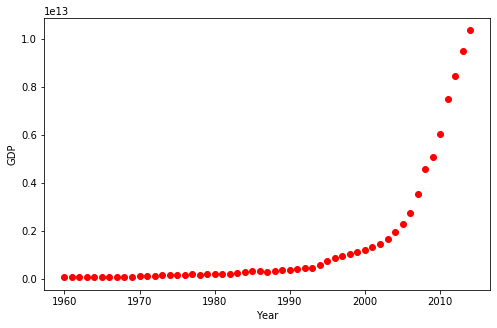

In [4]:
plt.figure(figsize=(8,5))
plt.plot(x,y,'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [5]:
# normalization of the data
x = x/max(x)
y = y/max(y)

In [9]:
def sigmoid(x,Beta_1,Beta_2):
    return 1/(1+np.exp(-Beta_1*(x-Beta_2)))

In [10]:
from scipy.optimize import curve_fit
popt,pcov = curve_fit(sigmoid,x,y)
print("beta1 %f, beta2 %f" %(popt[0],popt[1]))

beta1 690.451711, beta2 0.997207


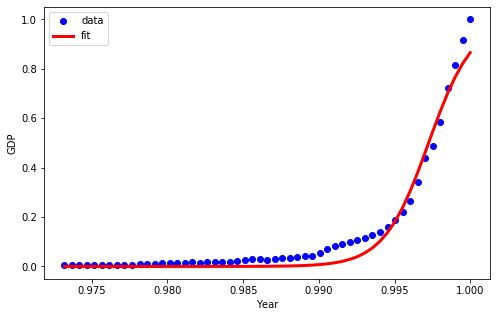

In [21]:
xx = np.linspace(1960,2015,55)
xx = x/max(x)
yy = sigmoid(x,*popt)
plt.figure(figsize=(8,5))
plt.plot(x,y,'bo',label='data')
plt.plot(xx,yy,'r', linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [15]:
# accuracy 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [16]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [19]:
popt,pcon = curve_fit(sigmoid,train_x,train_y)
y_hat = sigmoid(test_x,*popt)

In [20]:
print(r2_score(y_hat,test_y))

0.9627618476526093
